In [75]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier 
from sklearn.ensemble import GradientBoostingClassifier


In [76]:
#inspecting the data
train_data=pd.read_csv(r"C:\Users\nidhi\Downloads\train_s3TEQDk.csv")
test_data=pd.read_csv(r"C:\Users\nidhi\Downloads\test_mSzZ8RL.csv")
train_shape=train_data.shape
train_shape# finding the number of rows and columns of train_data

(245725, 11)

In [77]:
test_shape=test_data.shape
test_shape# finding the number of rows and columns of test_data .

(105312, 10)

### we see that we have 245725 rows and 11 columns in train data and 105312 rows and 10 columns in test data

In [78]:
#In order to proceed further we will check whether our dataset contains any null values or not and if it contains null values then we have to remove them so that we can get better analaysis which will lead to unbiased result 
train_data.isnull().sum()/train_shape[0]*100
#we can see that we have 11.93 % misising values in credit_product column of train_data

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [79]:
test_data.isnull().sum()/test_shape[0]*100
# we can see that we have 11.89% missing values in credit_product column in test_data.

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

### so now we have calculated the ratio of null values in train and test data

In [80]:
train_data.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Is_Lead                 int64
dtype: object

In [81]:
# we will now lookupon the number of categorical features on train data .
categorical=train_data.select_dtypes(include=[np.object])
print("Number of categorical features",categorical.shape[1])
#we will now lookupon the number of numerical features on train data 
numerical=train_data.select_dtypes(include=[np.int64,np.float])
print("Number of numerical features ",numerical.shape[1])

Number of categorical features 7
Number of numerical features  4


In [82]:
test_data.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
dtype: object

In [83]:
# we will now lookupon the number of categorical features on test data .
categorical=test_data.select_dtypes(include=[np.object])
print("Number of categorical features",categorical.shape[1])
#we will now lookupon the number of numerical features on test data 
numerical=test_data.select_dtypes(include=[np.int64,np.float])
print("Number of numerical features ",numerical.shape[1])

Number of categorical features 7
Number of numerical features  3


In [84]:
train_data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         29325
Avg_Account_Balance        0
Is_Active                  0
Is_Lead                    0
dtype: int64

In [85]:
# we see that credit product has null values and hence we should fill it .
# since credit product is a catrgorical datatype so we must replace the null values with the mode of that column.
train_data["Credit_Product"].fillna(train_data["Credit_Product"].mode()[0],inplace=True)
train_data.isnull().sum()


ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [86]:
test_data.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [87]:
#we see that in test data also credit product contains null values.
#since credit product is a categorical datatype therefore fill the missing values wioth mode
test_data["Credit_Product"].fillna(test_data["Credit_Product"].mode()[0],inplace=True)
test_data.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

### So now we have successfully filled all the null values.


In [88]:
train_data.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [89]:
train_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245720,BPAWWXZN,Male,51,RG284,Self_Employed,X3,109,No,1925586,No,0
245721,HFNB7JY8,Male,27,RG268,Salaried,X1,15,No,862952,Yes,0
245722,GEHAUCWT,Female,26,RG281,Salaried,X1,13,No,670659,No,0
245723,GE7V8SAH,Female,28,RG273,Salaried,X1,31,No,407504,No,0


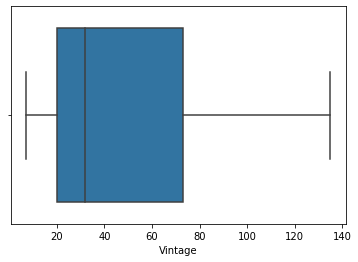

In [90]:
# now we will detect whether any column in train data contains outlier or not
sns.boxplot(x=train_data["Vintage"])

### no outlier detected in vintage column¶

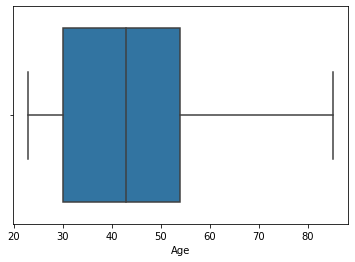

In [91]:
sns.boxplot(x=train_data["Age"])

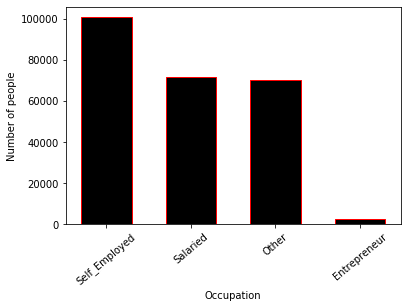

In [92]:
ans=train_data["Occupation"].value_counts()
x1=ans.index
y1=ans.values
plt.bar(x1,y1,width=0.6,color="black",edgecolor="red")
plt.xlabel("Occupation")
plt.xticks(rotation=40)
plt.ylabel("Number of people")
plt.show()

### we noticed that the most of the people are self employed

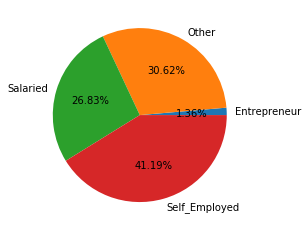

In [93]:
a=train_data["Occupation"]
ans=train_data.groupby(a)["Avg_Account_Balance"].sum()
xx=ans.index
yy=ans.values
plt.pie(yy,labels=xx,autopct="%.2f%%")
plt.show()
# we here noticed that the most amount of money is with self employed people 

### we here noticed that the most amount of money is with self employed people

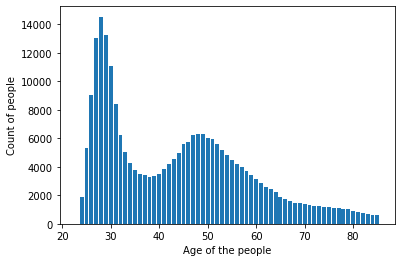

In [94]:
ans=train_data["Age"].value_counts()
x=ans.index
y=ans.values
plt.bar(x,y)
plt.xlabel("Age of the people")
plt.ylabel("Count of people")
plt.show()


### we here noticed that the maximum people are of age group 30

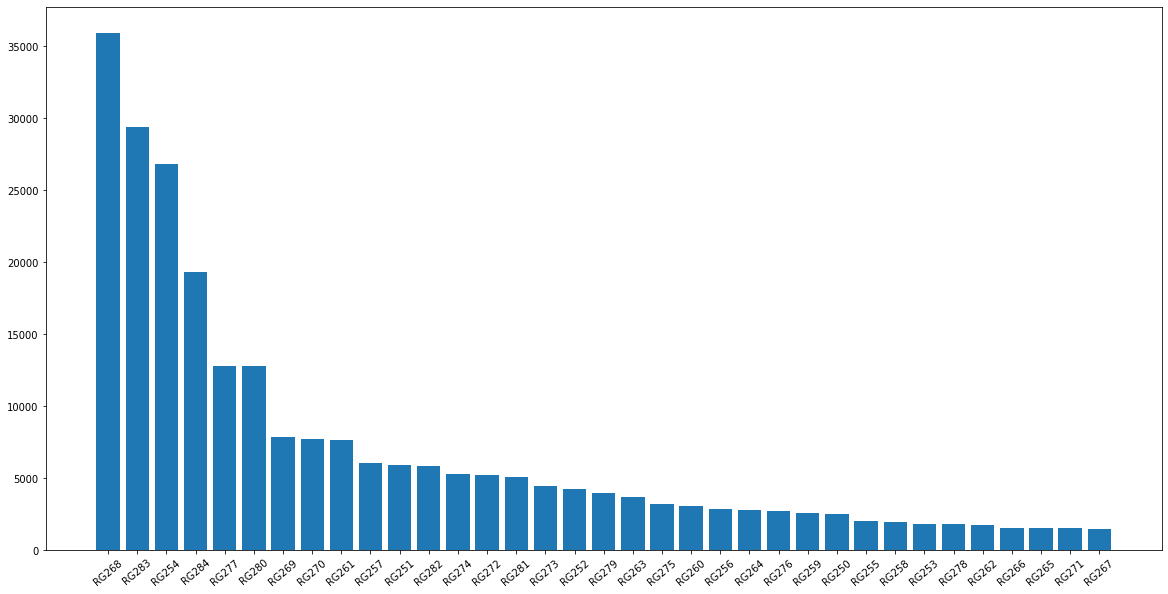

In [95]:
plt.figure(figsize=(20,10))
region=train_data["Region_Code"].value_counts()
region_x=region.index
region_y=region.values
plt.bar(region_x,region_y)
plt.xticks(rotation=40)
plt.show()

### In this we observe that the count of the people living in the region RG268 is maximum

In [96]:
#checking whether the data set is balanced or not 
is_lead_one=train_data[train_data["Is_Lead"]==1].shape
is_lead_zero=train_data[train_data["Is_Lead"]==0].shape

In [97]:
is_lead_one,is_lead_zero

((58288, 11), (187437, 11))

### from here we can see that the data set is not balanced as the class for 0 is very much high than class of 1.

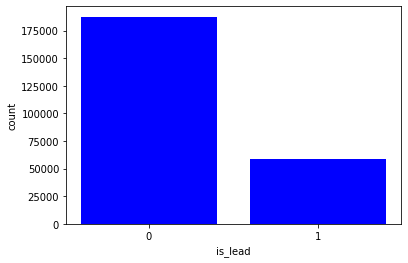

In [98]:
# visually describing that the dataset is not balanced
ans=train_data["Is_Lead"].value_counts()
x=ans.index
y=ans.values
plt.bar(x,y,color="blue")
plt.xlabel("is_lead")
plt.ylabel("count")
plt.xticks([0,1])
plt.show()

### we can clearly see that the data set is highly unbalanced

In [99]:
# now making the dataset balanced
train_data=pd.concat([train_data[train_data["Is_Lead"]==0].iloc[:60000,:],train_data[train_data["Is_Lead"]==1]])


In [100]:
train_data

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
...,...,...,...,...,...,...,...,...,...,...,...
245697,DTQJBXK6,Male,43,RG257,Salaried,X1,50,No,551203,Yes,1
245699,MARTXU7T,Male,53,RG254,Other,X2,19,No,1141825,Yes,1
245709,4GZKAUQC,Male,36,RG284,Self_Employed,X3,15,Yes,608110,Yes,1
245713,BZ7NHPMJ,Female,41,RG277,Self_Employed,X2,13,Yes,898170,Yes,1


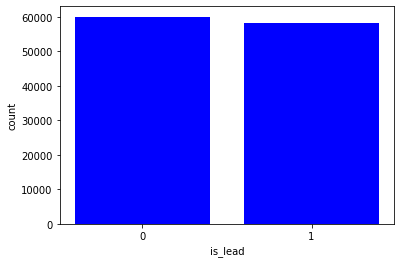

In [101]:
ans=train_data["Is_Lead"].value_counts()
x=ans.index
y=ans.values
plt.bar(x,y,color="blue")
plt.xlabel("is_lead")
plt.ylabel("count")
plt.xticks([0,1])
plt.show()

### now we can see that data has become balanced

In [102]:
# now we are performing feature engineering like feature extraction,feature scaling to have a better analysis of the data so that it can predict better.
train_data.drop("ID",axis=1,inplace=True)


In [103]:
test_data.drop("ID",axis=1,inplace=True)

In [104]:
# Encoding the features of training data(using label encoding )
label = preprocessing.LabelEncoder()
for column_name in train_data.columns:
    if train_data[column_name].dtype==object:
        
        train_data[column_name] = label.fit_transform(train_data[column_name])


# Encoding the features of testing data
label = preprocessing.LabelEncoder()
for column_name in test_data.columns:
    if test_data[column_name].dtype==object:
        
    
        test_data[column_name] = label.fit_transform(test_data[column_name])


In [105]:
train_data.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active', 'Is_Lead'],
      dtype='object')

In [106]:
test_data.columns

Index(['Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code', 'Vintage',
       'Credit_Product', 'Avg_Account_Balance', 'Is_Active'],
      dtype='object')

In [107]:
train_data.dtypes

Gender                 int32
Age                    int64
Region_Code            int32
Occupation             int32
Channel_Code           int32
Vintage                int64
Credit_Product         int32
Avg_Account_Balance    int64
Is_Active              int32
Is_Lead                int64
dtype: object

In [108]:
test_data.dtypes

Gender                 int32
Age                    int64
Region_Code            int32
Occupation             int32
Channel_Code           int32
Vintage                int64
Credit_Product         int32
Avg_Account_Balance    int64
Is_Active              int32
dtype: object

In [109]:
train_data

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,18,1,2,43,0,1045696,0,0
1,0,30,27,2,0,32,0,581988,0,0
2,0,56,18,3,2,26,0,1484315,1,0
3,1,34,20,2,0,19,0,470454,0,0
4,0,30,32,2,0,33,0,886787,0,0
...,...,...,...,...,...,...,...,...,...,...
245697,1,43,7,2,0,50,0,551203,1,1
245699,1,53,4,1,1,19,0,1141825,1,1
245709,1,36,34,3,2,15,1,608110,1,1
245713,0,41,27,3,1,13,1,898170,1,1


In [110]:
test_data

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,4,1,0,25,1,742366,0
1,1,43,18,1,1,49,0,925537,0
2,1,31,20,2,0,14,0,215949,0
3,1,29,22,1,0,33,0,868070,0
4,0,29,20,1,0,19,0,657087,0
...,...,...,...,...,...,...,...,...,...
105307,1,52,18,2,1,86,1,4242558,1
105308,1,55,27,1,1,86,1,1159153,0
105309,1,35,4,2,3,15,0,1703727,0
105310,1,53,4,1,2,93,0,737178,1


In [111]:
train_data.shape,test_data.shape

((118288, 10), (105312, 9))

In [112]:
train_data_ds=train_data.values

In [113]:
test_data_ds=test_data.values

In [114]:
data=train_data_ds[:,:-1]
target=train_data_ds[:,-1]

In [115]:
# performing feature scaling (standarization)
scaler=StandardScaler()
scaler.fit(data)
data=scaler.transform(data)
test_data_ds=scaler.transform(test_data_ds)

In [116]:
x_train,x_test,y_train,y_test=model_selection.train_test_split(data,target,random_state=1)

### Applying models

In [117]:
# applying logistic regression
cls=LogisticRegression()
cls.fit(x_train,y_train)

C:\Users\nidhi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [118]:
y_test_predict=cls.predict(x_test)
y_test_predict

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [119]:
logistic_score=cls.score(x_test,y_test)
logistic_score

0.6574124171513593

In [120]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.67      0.65      0.66     15094
           1       0.64      0.67      0.66     14478

    accuracy                           0.66     29572
   macro avg       0.66      0.66      0.66     29572
weighted avg       0.66      0.66      0.66     29572



In [121]:
# using naive_bayes
gnb = GaussianNB()

In [122]:
gnb.fit(x_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [123]:
prediction=gnb.predict(x_test)
prediction

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [124]:
naive_score=gnb.score(x_test,y_test)
naive_score

0.6588326795617476

In [125]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.68      0.62      0.65     15094
           1       0.64      0.70      0.67     14478

    accuracy                           0.66     29572
   macro avg       0.66      0.66      0.66     29572
weighted avg       0.66      0.66      0.66     29572



In [126]:
# applying decision trees algorithm
classifier_decision = DecisionTreeClassifier(criterion = "entropy", random_state=0)
classifier_decision.fit(x_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [127]:
y_pred_decision = classifier_decision.predict(x_test)
y_pred_decision

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [128]:
decision_score=classifier_decision.score(x_test,y_test)
decision_score

0.61450020289463

In [129]:
print(classification_report(y_test,y_pred_decision))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62     15094
           1       0.61      0.61      0.61     14478

    accuracy                           0.61     29572
   macro avg       0.61      0.61      0.61     29572
weighted avg       0.61      0.61      0.61     29572



In [130]:
# using random forest classifier
rf_clf =RandomForestClassifier()
rf_clf.fit(x_train, y_train)

C:\Users\nidhi\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [131]:
p=rf_clf.predict(x_test)
p

array([0, 0, 1, ..., 1, 1, 0], dtype=int64)

In [132]:
random_score=rf_clf.score(x_test,y_test)
random_score

0.6749628026511565

In [133]:
print(classification_report(y_test,p))

              precision    recall  f1-score   support

           0       0.67      0.73      0.70     15094
           1       0.69      0.62      0.65     14478

    accuracy                           0.67     29572
   macro avg       0.68      0.67      0.67     29572
weighted avg       0.68      0.67      0.67     29572



In [134]:
random_forest_result=rf_clf.predict(test_data_ds)

In [135]:
random_forest_result

array([0, 0, 0, ..., 1, 1, 0], dtype=int64)

In [136]:
#applying XGBClassifier
xgb = XGBClassifier(class_weight='balanced').fit(x_train, y_train)
xgb_predicted_Y = xgb.predict(x_test)


C:\Users\nidhi\Anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[15:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "class_weight" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:50:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [137]:
xgb_score=xgb.score(x_test,y_test)
xgb_score

0.7155417286622481

In [138]:
print(classification_report(y_test,xgb_predicted_Y))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72     15094
           1       0.70      0.73      0.71     14478

    accuracy                           0.72     29572
   macro avg       0.72      0.72      0.72     29572
weighted avg       0.72      0.72      0.72     29572



In [140]:
# apllying gradient boost classifier
gradient_boost_clf = GradientBoostingClassifier()
gradient_boost_clf.fit(x_train, y_train)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [145]:
score=gradient_boost_clf.score(x_test,y_test)
score

0.7177735695928581

### after comparing all the scores we observe that Gradientboost classifer has the maximum score therefore we will use this classifier

In [146]:
ans=gradient_boost_clf.predict(test_data_ds)

In [147]:
final_result=pd.read_csv(r"C:\Users\nidhi\Downloads\first.csv")
final_result["Is_Lead"]=ans
final_result.head()

,ID,Is_Lead
0,VBENBARO,0
1,CCMEWNKY,1
2,VK3KGA9M,0
3,TT8RPZVC,0
4,SHQZEYTZ,0


In [148]:
final_result.to_csv("neha_final_result.csv",index=False)